## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
number_mice = len(combined_data_df["Mouse ID"].unique())
print(f"The number of mice in the DataFrame is {number_mice}")

The number of mice in the DataFrame is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df = combined_data_df[combined_data_df.duplicated(["Mouse ID", "Timepoint"])]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicated_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = combined_data_df.drop_duplicates(["Mouse ID", "Timepoint"])
cleaned_data_df.reset_index(drop=True,inplace=True)
cleaned_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_number_mice = len(cleaned_data_df["Mouse ID"].unique())
print(f"The number of mice in the DataFrame is {cleaned_number_mice}")

The number of mice in the DataFrame is 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_mean = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_volume_median = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_var = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sem = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_tumer_df = pd.DataFrame(tumor_volume_mean)
summary_tumer_df.columns = ["Mean of Tumor Volume"]
summary_tumer_df["Median of Tumor Volume"] = tumor_volume_median
summary_tumer_df["Var of Tumor Volume"] = tumor_volume_var
summary_tumer_df["Std of Tumor Volume"] = tumor_volume_std
summary_tumer_df["Sem of Tumor Volume"] = tumor_volume_sem
summary_tumer_df

,Mean of Tumor Volume,Median of Tumor Volume,Var of Tumor Volume,Std of Tumor Volume,Sem of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

Text(0, 0.5, 'Number of Data Points')

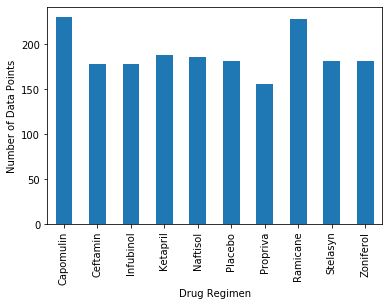

In [56]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
mouse_treat_df = cleaned_data_df[["Timepoint", "Drug Regimen","Mouse ID"]]
grouped_mouse_df = mouse_treat_df.groupby(["Drug Regimen"]).count()
grouped_mouse_df.rename(columns={"Timepoint":"Number of Data Points", "Mouse ID":"Number of Mouse"}, inplace=True)
ax = grouped_mouse_df.plot(kind="bar", y="Number of Data Points", legend=False )
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Data Points")

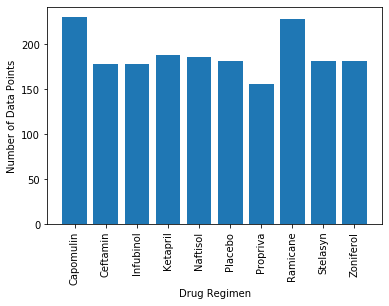

In [57]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = [x for x in range(len(grouped_mouse_df.index))]

plt.bar(x_axis, grouped_mouse_df["Number of Data Points"])
plt.xticks(x_axis, grouped_mouse_df.index, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

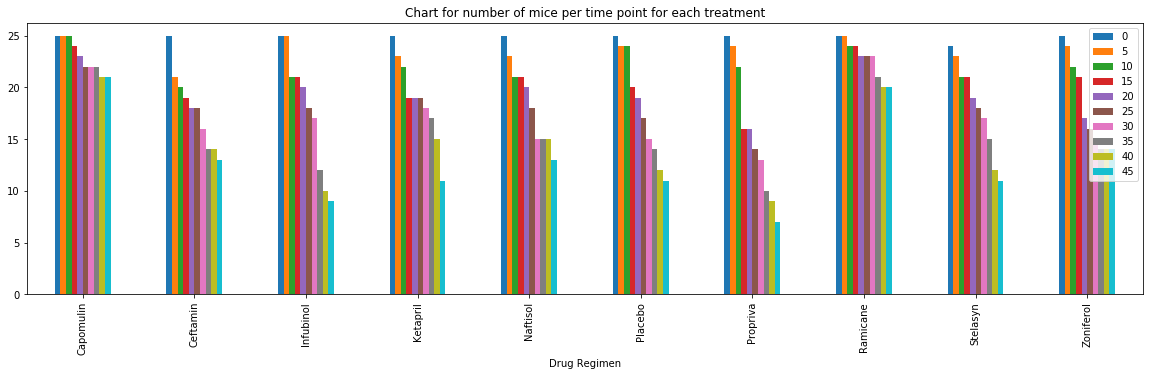

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
mouse_treat_df = cleaned_data_df[["Timepoint", "Drug Regimen","Mouse ID"]]

a = pd.pivot_table(mouse_treat_df, "Mouse ID", index = ["Drug Regimen"], columns=["Timepoint"], aggfunc='count')

a.plot(kind="bar", figsize=(20,5), title="Chart for number of mice per time point for each treatment").legend(loc="upper right")



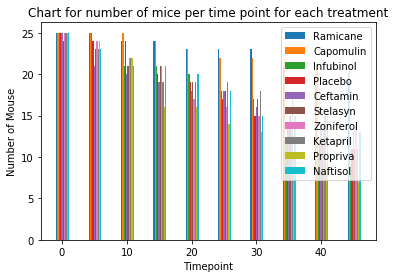

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
Drug_Regimen = mouse_treat_df["Drug Regimen"].unique()
x_axis_label = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
x_axis_number = [x for x in range(len(x_axis_label))]
x_axis_position = []

for y in range(len(Drug_Regimen)):
    temp_position = round(-1 + (y+1)/5,2)
    temp_list=[ round(x_axis_label[x] + temp_position, 2)  for x in x_axis_number]
    x_axis_position.append(temp_list)   

mouse_per_timepoint = mouse_treat_df.groupby("Timepoint").count()

for treatment in Drug_Regimen:
    mouse_per_treat_df = mouse_treat_df.loc[mouse_treat_df["Drug Regimen"] == treatment, ["Timepoint", "Mouse ID"]]
    mouse_per_timepoint[treatment] = mouse_per_treat_df.groupby("Timepoint").count()

del mouse_per_timepoint["Drug Regimen"]
del mouse_per_timepoint["Mouse ID"]

fig, ax = plt.subplots()

temp_index = 0
for temp_value in Drug_Regimen:
    ax.bar(x_axis_position[temp_index], mouse_per_timepoint[temp_value], width=0.2, label=temp_value)
    temp_index += 1
ax.set_xlabel("Timepoint")
ax.set_ylabel("Number of Mouse")
ax.set_title("Chart for number of mice per time point for each treatment")

plt.legend(loc="upper right")
plt.show()


## Pie Plots

Text(0, 0.5, 'Sex')

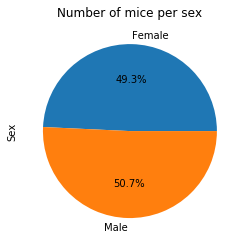

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_per_sex = cleaned_data_df.groupby("Sex")["Mouse ID"].count()
ax = mouse_per_sex.plot(kind="pie", title="Number of mice per sex", autopct = "%1.1f%%")
ax.set_ylabel("Sex")

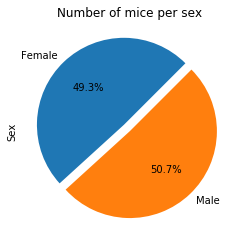

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_per_sex_list = [ x for x in mouse_per_sex]
mouse_per_sex_list
plt.pie(mouse_per_sex_list, labels=mouse_per_sex.keys(), autopct = "%1.1f%%", startangle=45, explode=[0.1, 0] )
plt.ylabel("Sex")
plt.title("Number of mice per sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# What are four of the most promising treatment?
time_point45_df = cleaned_data_df.loc[cleaned_data_df["Timepoint"]==45].groupby("Drug Regimen").mean()
four_promising_drug = [x for x in time_point45_df.nsmallest(4, "Tumor Volume (mm3)").index]
print(f"Four of the most promising treatments are {four_promising_drug}")  

Four of the most promising treatments are ['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']


In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
four_drug_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"].isin(four_promising_drug)]
final_tumor = four_drug_df.loc[four_drug_df.Timepoint==45,["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean_final_tumor = round(final_tumor["Tumor Volume (mm3)"].mean(),3)
median_final_tumor = round(final_tumor["Tumor Volume (mm3)"].median(),3)
max_final_tumor = round(final_tumor["Tumor Volume (mm3)"].max(),3)
min_final_tumor = round(final_tumor["Tumor Volume (mm3)"].min(),3)
print(f"Average final tumor volume of mouses across four of the most promising drug is {mean_final_tumor}")
print(f"Median of final tumor volume of mouses across four of the most promising drug is {median_final_tumor}")

tumor_quartiles = final_tumor["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
iq3 = round(tumor_quartiles[0.75],3)
iq2 = round(tumor_quartiles[0.5],3)
iq1 = round(tumor_quartiles[0.25],3)
iqr_tumor = round(iq3 - iq1,3)
upper_boundary = round(iq3 + 1.5*iqr_tumor,3)
lower_boundary = round(iq1 - 1.5*iqr_tumor,3)
out_lier = final_tumor.loc[(final_tumor["Tumor Volume (mm3)"]> upper_boundary) | (final_tumor["Tumor Volume (mm3)"] < lower_boundary)]
num_out_lier = out_lier["Mouse ID"].count()
print(f"Qualtile value of Tumor volumes : Media value = {iq2}, 1st Quartile = {iq1}, 3rd Quartile = {iq3}")
print(f"IQR is {iqr_tumor}, upper boundary is {upper_boundary}, lower boundary is {lower_boundary}")
print(f"Maximum value of final tumor volume of mouses across four of the most promising drug is {max_final_tumor}")
print(f"Minimum value of final tumor volume of mouses across four of the most promising drug is {min_final_tumor}")
print(f"The maximum value {max_final_tumor}  and minimum value {min_final_tumor} of final tumor volume of mouses within upper boundary {upper_boundary} and lower bounday {lower_boundary}.")
print(f"Therefore, there is {num_out_lier} number of outlier")

Average final tumor volume of mouses across four of the most promising drug is 45.803
Median of final tumor volume of mouses across four of the most promising drug is 40.159
Qualtile value of Tumor volumes : Media value = 40.159, 1st Quartile = 33.48, 3rd Quartile = 62.142
IQR is 28.662, upper boundary is 105.135, lower boundary is -9.513
Maximum value of final tumor volume of mouses across four of the most promising drug is 72.227
Minimum value of final tumor volume of mouses across four of the most promising drug is 22.05
The maximum value 72.227  and minimum value 22.05 of final tumor volume of mouses within upper boundary 105.135 and lower bounday -9.513.
Therefore, there is 0 number of outlier


In [15]:
# 

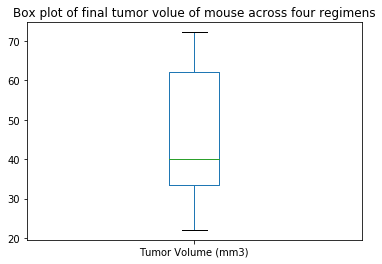

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor["Tumor Volume (mm3)"].plot(kind="box", title="Box plot of final tumor volue of mouse across four regimens")

## Line and Scatter Plots

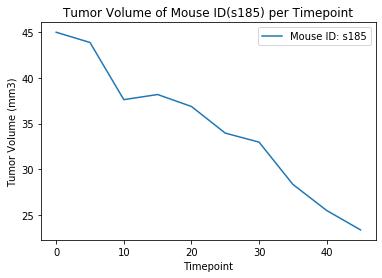

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"]=="Capomulin", ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
s185_df = capomulin_df.loc[capomulin_df["Mouse ID"]=="s185"]
s185_df
plt.plot(s185_df["Timepoint"], s185_df["Tumor Volume (mm3)"], label="Mouse ID: s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume of Mouse ID(s185) per Timepoint")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Scatter Plot of mouse weight versus average tumor volume for Capomulin regimen')

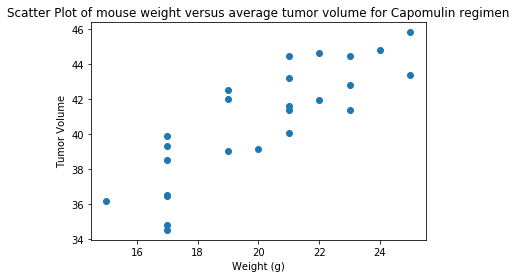

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_volume_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"]=="Capomulin", ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_volume_mean_df = weight_volume_df.groupby("Mouse ID").mean()
weight_list = weight_volume_mean_df["Weight (g)"]
volume_list = weight_volume_mean_df["Tumor Volume (mm3)"]
plt.scatter(weight_list, volume_list)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume")
plt.title("Scatter Plot of mouse weight versus average tumor volume for Capomulin regimen")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.842 and p-value is 0.0
Linear Regression line equation is y = 0.95x + 21.55


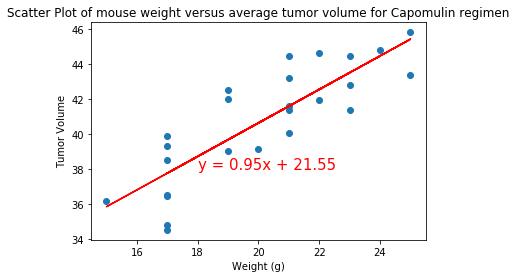

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight_list, volume_list)
print(f"The correlation between both factors is {round(correlation[0],3)} and p-value is {round(correlation[1],3)}")


x_values = weight_list
y_values = volume_list

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression line equation is {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18, 38),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume")
plt.title("Scatter Plot of mouse weight versus average tumor volume for Capomulin regimen")
plt.show()
